In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [5]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [6]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df['sex']  =df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['smoker'] =df['smoker'].apply(lambda x: 1 if x== 'yes' else 0)

In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [10]:
df =df.join(pd.get_dummies(df.region, dtype=int)).drop('region', axis=1)

In [11]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

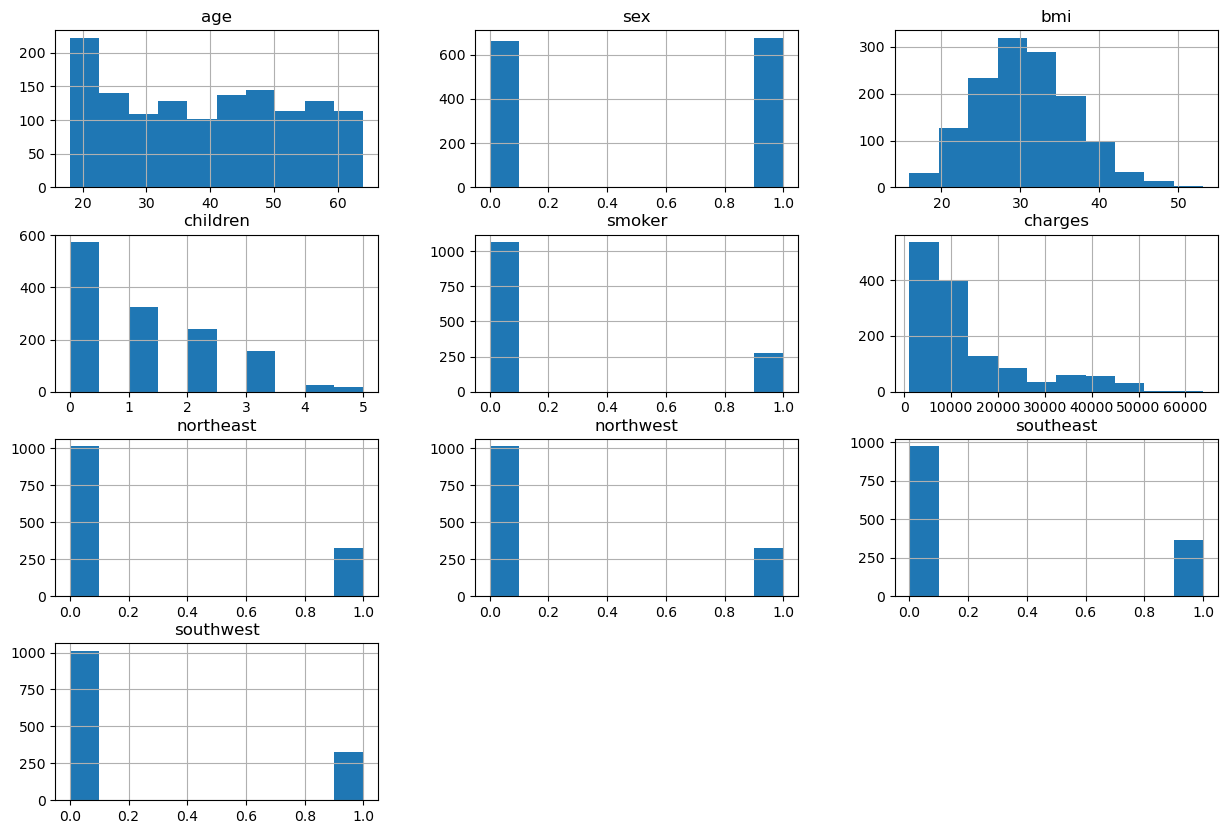

In [12]:
df.hist(figsize=(15, 10))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   int32  
 7   northwest  1338 non-null   int32  
 8   southeast  1338 non-null   int32  
 9   southwest  1338 non-null   int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 83.8 KB


In [14]:
df.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<Axes: >

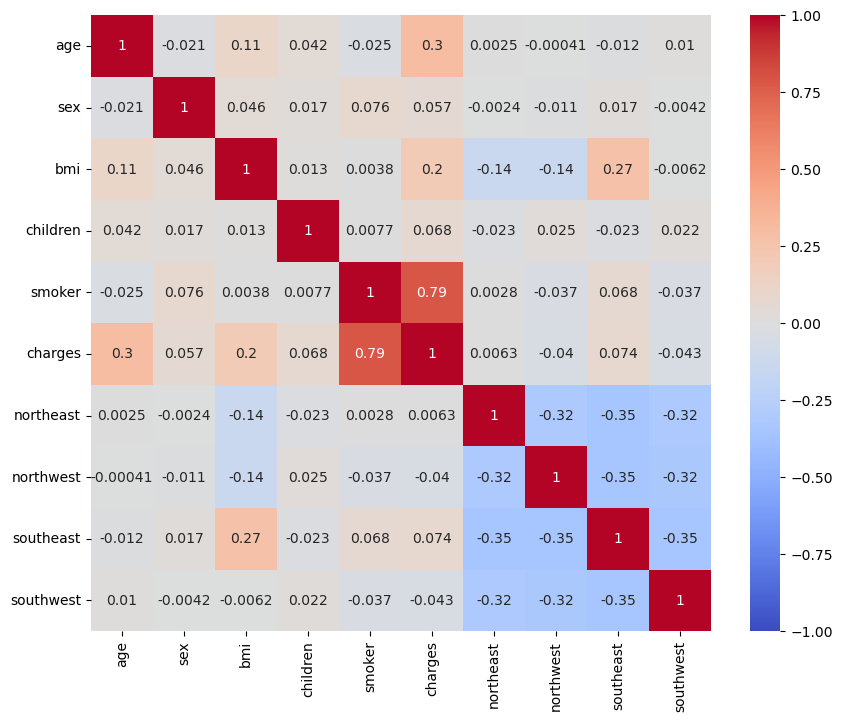

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [18]:
model.score(X_test, y_test)

0.8596928656608959

In [19]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

In [20]:
rmse

4673.899656270703

In [21]:
df.charges.std()

12110.011236693994

In [22]:
y_test.std()

12501.187624230894

In [23]:
df.charges.median()

9382.033

In [24]:
mae = mean_absolute_error(y_pred, y_test)

In [25]:
mae

2600.142966031803

Text(0.5, 1.0, 'Prediction VS Truth')

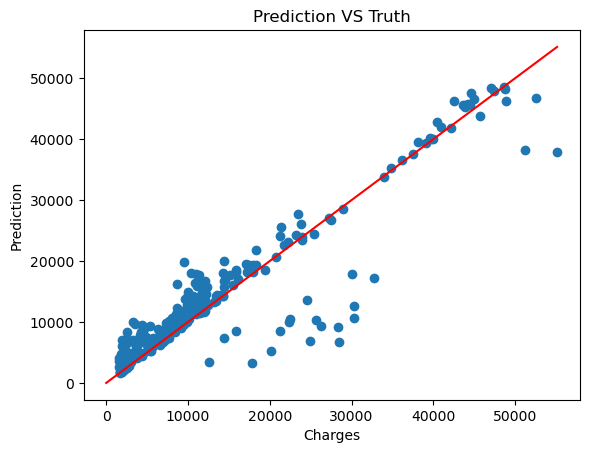

In [26]:
import numpy as np

plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)), color='red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction VS Truth')

In [27]:
feature_importances = sorted(zip(X.columns, model.feature_importances_), key=lambda x: x[1], reverse=True)


Text(0.5, 1.0, 'Feature_Importances')

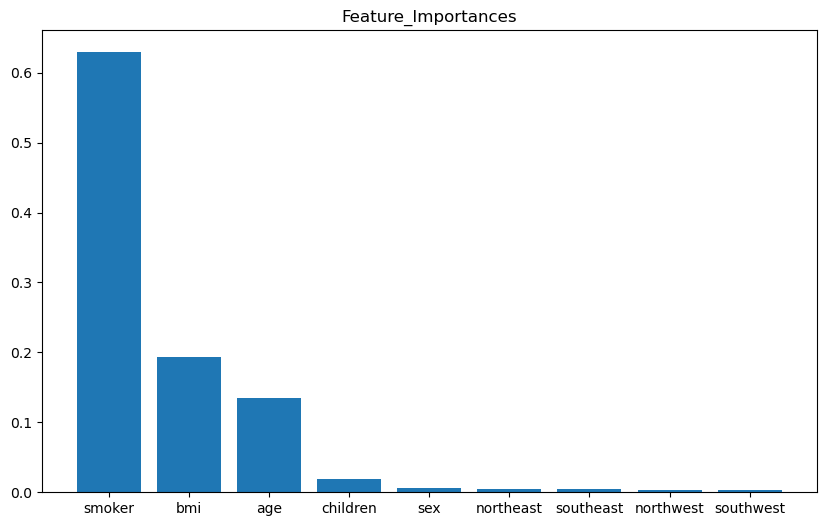

In [28]:
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in feature_importances], [x[1] for x in feature_importances])
plt.title('Feature_Importances')

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 2, 5],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6]
}

model = RandomForestRegressor(n_jobs=-1) 

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')


In [44]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 5],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='neg_mean_absolute_error')

In [45]:
grid_search.best_params_

{'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 4}

In [46]:
model = grid_search.best_estimator_

In [47]:
model

RandomForestRegressor(min_samples_leaf=6, min_samples_split=4, n_jobs=-1)

In [48]:
model.score(X_test, y_test)

0.8675680404950298

In [55]:
model.score(X_train, y_train)

0.9015945027121679

In [ ]:
model.accuracy

In [49]:
y_pred = model.predict(X_test)

In [50]:
rmse = root_mean_squared_error(y_test, y_pred)

In [51]:
rmse

4540.836968552444

In [52]:
mae = mean_absolute_error(y_test, y_pred)

In [53]:
mae

2461.6446642545166

Text(0.5, 1.0, 'Prediction VS Truth')

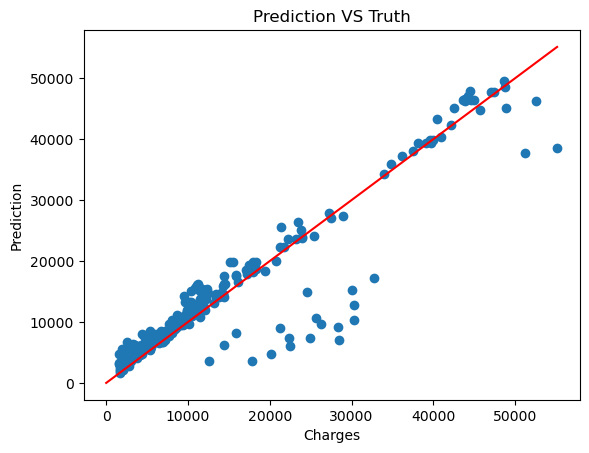

In [54]:
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)), color='red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction VS Truth')